In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [10]:
passenger_data = pd.read_csv('monthly_passenger_counts_enriched.csv')
gas_data = pd.read_csv('gas_prices_enriched.csv')

merged = pd.concat([passenger_data, gas_data.reset_index(drop=True)], axis=1)


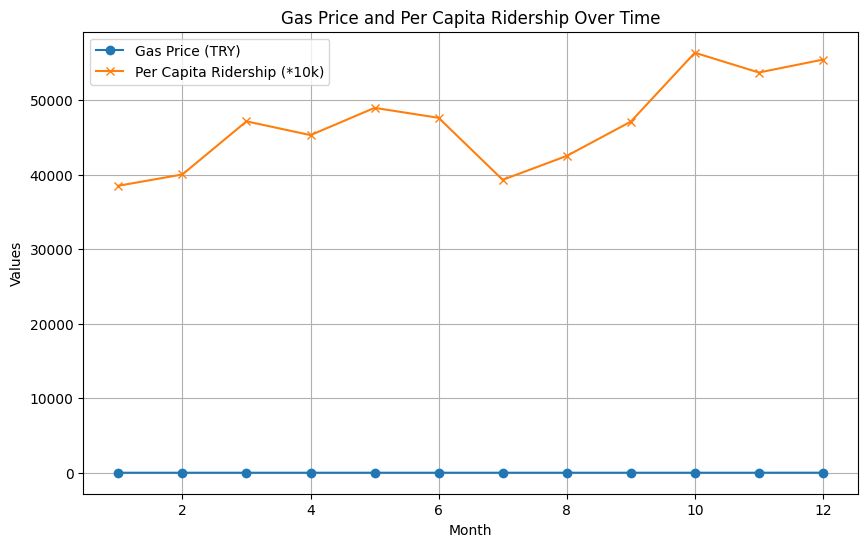

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(merged['month'], merged['gas_price'], label='Gas Price (TRY)', marker='o')
plt.plot(merged['month'], merged['per_capita_ridership']*10000, label='Per Capita Ridership (*10k)', marker='x')
plt.title('Gas Price and Per Capita Ridership Over Time')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.savefig('lineplot_gas_ridership.png')
plt.show()
plt.close()


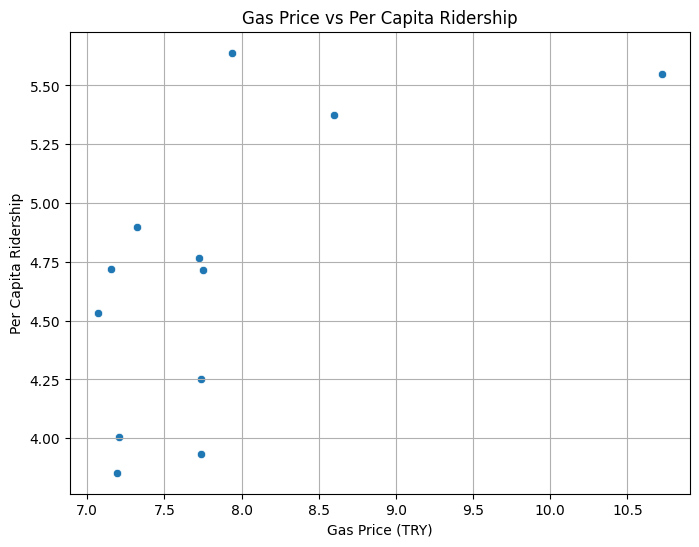

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=merged['gas_price'], y=merged['per_capita_ridership'])
plt.title('Gas Price vs Per Capita Ridership')
plt.xlabel('Gas Price (TRY)')
plt.ylabel('Per Capita Ridership')
plt.grid(True)
plt.savefig('scatterplot_gas_vs_ridership.png')
plt.show()
plt.close()


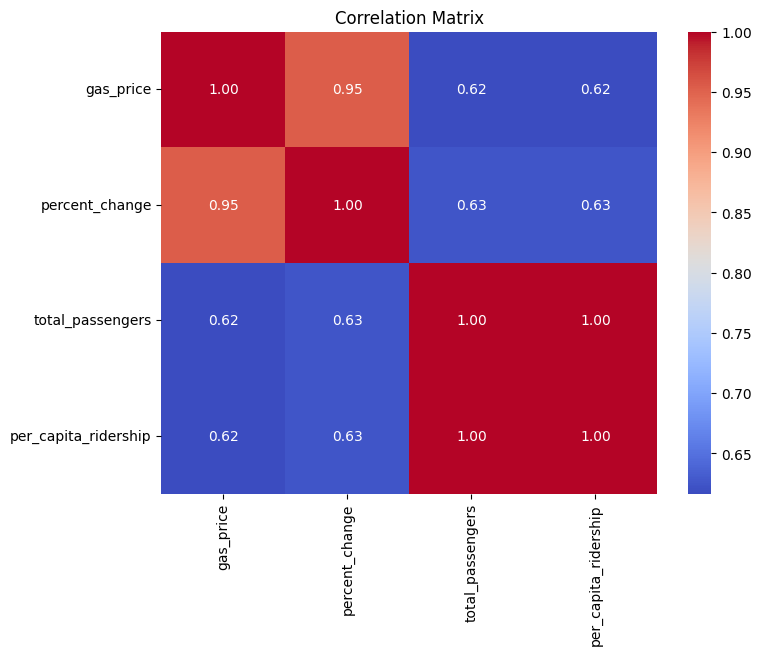

In [14]:
correlation_matrix = merged[['gas_price', 'percent_change', 'total_passengers', 'per_capita_ridership']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_heatmap.png')
plt.show()
plt.close()


In [15]:
pearson_coef, pearson_p = pearsonr(merged['gas_price'], merged['per_capita_ridership'])
spearman_coef, spearman_p = spearmanr(merged['gas_price'], merged['per_capita_ridership'])

print("--- Hypothesis Testing Results ---")
print(f"Pearson correlation coefficient: r = {pearson_coef:.3f}, p-value = {pearson_p:.4f}")
print(f"Spearman correlation coefficient: r = {spearman_coef:.3f}, p-value = {spearman_p:.4f}")

with open("hypothesis_results.txt", "w") as f:
    f.write("--- Hypothesis Testing Results ---\n")
    f.write(f"Pearson correlation coefficient: r = {pearson_coef:.3f}, p-value = {pearson_p:.4f}\n")
    f.write(f"Spearman correlation coefficient: r = {spearman_coef:.3f}, p-value = {spearman_p:.4f}\n")
    if pearson_p < 0.05:
        f.write("At 5% significance level, we reject the null hypothesis: There is a significant relationship between gas prices and public transport usage.\n")
    else:
        f.write("At 5% significance level, we fail to reject the null hypothesis: No significant relationship found.\n")


--- Hypothesis Testing Results ---
Pearson correlation coefficient: r = 0.617, p-value = 0.0327
Spearman correlation coefficient: r = 0.573, p-value = 0.0513
